In [1]:
# Librerías
import pandas as pd
import numpy as np
import seaborn as sns #Boxplots
import matplotlib.pyplot as plt #Histograma
from scipy.stats import anderson
import statistics
from scipy.stats import iqr # Rango intercuartilics

In [2]:
# Lectura de datos
df = pd.read_csv('./database/train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

Variables de tipo "int"

In [152]:
integer_columns = df.select_dtypes(include=['int']).columns.tolist()
integer_columns
# len(integer_columns)

['Id',
 'MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

# MSSubClass

1.-¿Qué variables presentan datos atípicos? Para este punto utilizar Bloxplots

<Axes: xlabel='MSSubClass'>

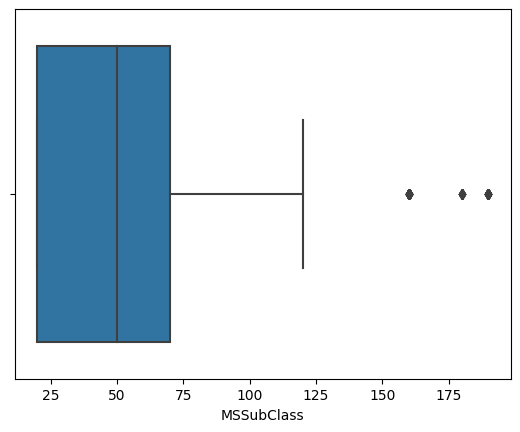

In [5]:
sns.boxplot(x=df["MSSubClass"])
# Se observan que hay datos atípicos

2.-¿En qué variables identifica un tipo de sesgo? Usar histogramas

Notas: 
* Sesgo positivo es a la derecha (cargado a la izquierda)
* Sesgo negativo es a la izquierda (cargado a la derecha).

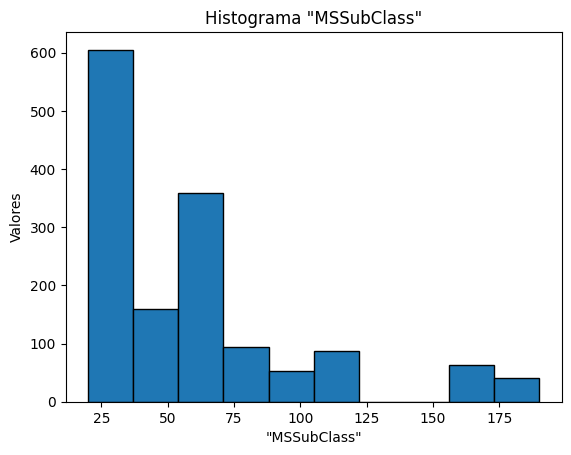

In [6]:
plt.hist(df["MSSubClass"], edgecolor='black')  # You can adjust the number of bins
plt.xlabel('"MSSubClass"')
plt.ylabel('Valores')
plt.title('Histograma "MSSubClass"')
plt.show()

# Se observa que la variable genera un sesgo positivo al tener una cola de distribución 

3.-¿Sigue una distribución normal cada variable numérica? Usar prueba de Anderson Darling

In [7]:
# Prueba de Anderson-Darling
resultado = anderson(df["MSSubClass"])
print("Estadística de prueba:", resultado.statistic)
print("Valores críticos:", resultado.critical_values)
print("Niveles de significancia:", resultado.significance_level)

if resultado.statistic < resultado.critical_values[2]:
    print("Distribución normal")
else:
    print("No sigue distribución normal")

Estadística de prueba: 89.2469024718389
Valores críticos: [0.574 0.654 0.785 0.916 1.089]
Niveles de significancia: [15.  10.   5.   2.5  1. ]
No sigue distribución normal


4.-¿Qué medida de tendencia central describe mejor a la variable y por qué? (media o mediana)

Notas:
* Si se sigue una distribución normal entonces la media y mediana es lo mismo, por lo que se puede elegir cualquier tendencia para describir a la variable.
* Si no se sigue una distribución normal entonces la media no aporta información relevante (genera ruido), por lo tanto la tendencia central que describe mejor a la variable es la "mediana" debido a que representa la mitad de los valores intrínsecos.

In [8]:
print("Media:",statistics.mean(df["MSSubClass"]))
print("Mediana:",statistics.median(df["MSSubClass"]))

Media: 56.897260273972606
Mediana: 50.0


Debido a que la variable no sigue una distribución normal, la medida de tendencia central que mejor describe a la variable es la **mediana**.

5.-¿Qué medida de variabilidad describe mejor a cada variable numérica y por qué? (desviación o rango intercuartil)

Notas:
* Si se sigue una distribución normal, entonces se ocupa una desviación estándar.
* Si no se sigue una distribución normal, entonces acompaña a la mediadana. Es decir, se ocupa como medida de vairiabilidad el rando intercuartil.

In [9]:
statistics.stdev(df["MSSubClass"])

42.300570993810425

In [10]:
iqr(df["MSSubClass"])

50.0

En este caso, debido a que la medida de tendencia que se seleccionó es la mediana, la medida de variabilidad que mejor describe a cada variable es el **rango intercuartil** que para este caso es 50.0

# LotArea

1.-¿Qué variables presentan datos atípicos? Para este punto utilizar Bloxplots

<Axes: xlabel='LotArea'>

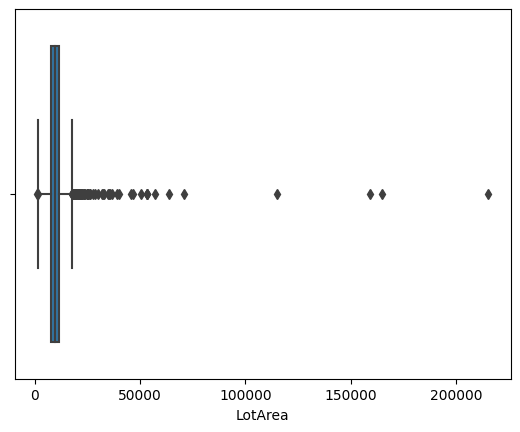

In [11]:
sns.boxplot(x=df['LotArea'])

# Se observan que hay datos atípicos

2.-¿En qué variables identifica un tipo de sesgo? Usar histogramas

Notas: 
* Sesgo positivo es a la derecha (cargado a la izquierda)
* Sesgo negativo es a la izquierda (cargado a la derecha).

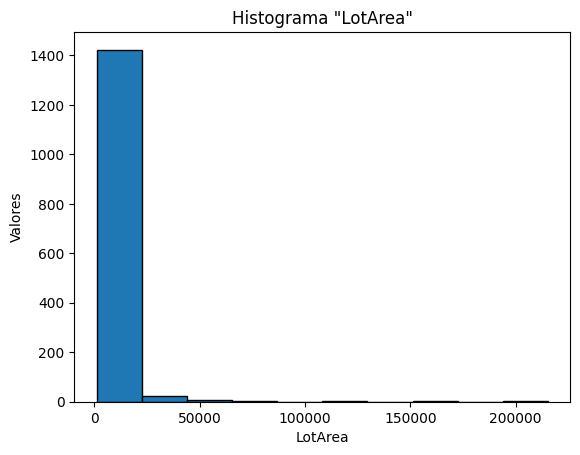

In [12]:
plt.hist(df['LotArea'], edgecolor='black')  # You can adjust the number of bins
plt.xlabel('LotArea')
plt.ylabel('Valores')
plt.title('Histograma "LotArea"')
plt.show()

#Sesgo positivo al estar a la derecha, se puede observar que se tienen outliers por lo que se puede ver modificado

3.-¿Sigue una distribución normal cada variable numérica? Usar prueba de Anderson Darling

In [13]:
# Prueba de Anderson-Darling
resultado = anderson(df['LotArea'])
print("Estadística de prueba:", resultado.statistic)
print("Valores críticos:", resultado.critical_values)
print("Niveles de significancia:", resultado.significance_level)

if resultado.statistic < resultado.critical_values[2]:
    print("Distribución normal")
else:
    print("No sigue distribución normal")

Estadística de prueba: 198.41833152322965
Valores críticos: [0.574 0.654 0.785 0.916 1.089]
Niveles de significancia: [15.  10.   5.   2.5  1. ]
No sigue distribución normal


4.-¿Qué medida de tendencia central describe mejor a la variable y por qué? (media o mediana)

Notas:
* Si se sigue una distribución normal entonces la media y mediana es lo mismo, por lo que se puede elegir cualquier tendencia para describir a la variable.
* Si no se sigue una distribución normal entonces la media no aporta información relevante (genera ruido), por lo tanto la tendencia central que describe mejor a la variable es la "mediana" debido a que representa la mitad de los valores intrínsecos.

In [14]:
print("Media:",statistics.mean(df['LotArea']))
print("Mediana:",statistics.median(df['LotArea']))

Media: 10516.828082191782
Mediana: 9478.5


Debido a que la variable no sigue una distribución normal, la medida de tendencia central que mejor describe a la variable es la **mediana**.

5.-¿Qué medida de variabilidad describe mejor a cada variable numérica y por qué? (desviación o rango intercuartil)

Notas:
* Si se sigue una distribución normal, entonces se ocupa una desviación estándar.
* Si no se sigue una distribución normal, entonces acompaña a la mediadana. Es decir, se ocupa como medida de vairiabilidad el rando intercuartil.

In [15]:
statistics.stdev(df['LotArea'])

9981.26493237915

In [16]:
iqr(df['LotArea'])

4048.0

En este caso, debido a que la medida de tendencia que se seleccionó es la mediana, la medida de variabilidad que mejor describe a cada variable es el **rango intercuartil** que para este caso es 4216.5

#  OverallQual

1.-¿Qué variables presentan datos atípicos? Para este punto utilizar Bloxplots

<Axes: xlabel='OverallQual'>

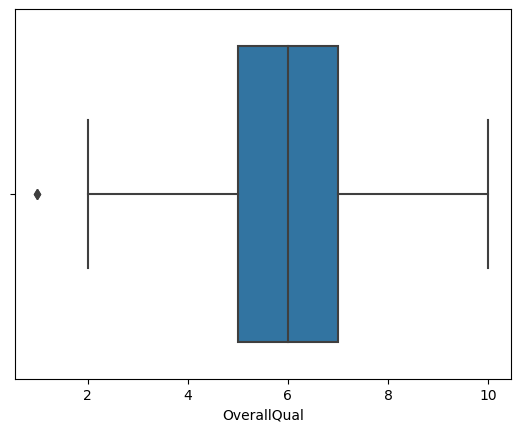

In [17]:
sns.boxplot(x=df['OverallQual'])
# Se observan que hay pocos datos atípicos

2.-¿En qué variables identifica un tipo de sesgo? Usar histogramas

Notas: 
* Sesgo positivo es a la derecha (cargado a la izquierda)
* Sesgo negativo es a la izquierda (cargado a la derecha).

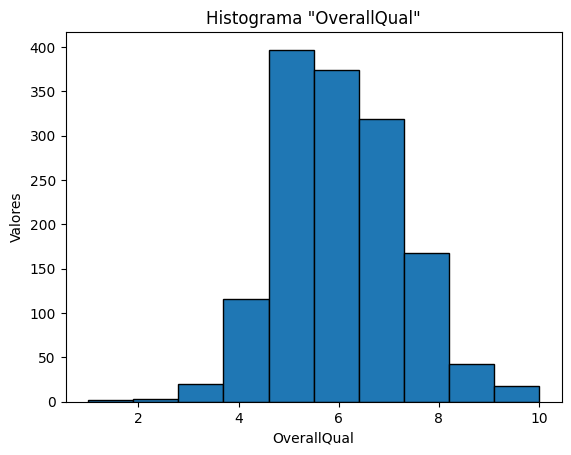

In [18]:
plt.hist(df['OverallQual'], edgecolor='black')  # You can adjust the number of bins
plt.xlabel('OverallQual')
plt.ylabel('Valores')
plt.title('Histograma "OverallQual"')
plt.show()

# Se observa un sesgo negativo al estar a la izquierda

3.-¿Sigue una distribución normal cada variable numérica? Usar prueba de Anderson Darling

In [19]:
# Prueba de Anderson-Darling
resultado = anderson(df['OverallQual'])
print("Estadística de prueba:", resultado.statistic)
print("Valores críticos:", resultado.critical_values)
print("Niveles de significancia:", resultado.significance_level)

if resultado.statistic < resultado.critical_values[2]:
    print("Distribución normal")
else:
    print("No sigue distribución normal")

Estadística de prueba: 35.230011585458215
Valores críticos: [0.574 0.654 0.785 0.916 1.089]
Niveles de significancia: [15.  10.   5.   2.5  1. ]
No sigue distribución normal


4.-¿Qué medida de tendencia central describe mejor a la variable y por qué? (media o mediana)

Notas:
* Si se sigue una distribución normal entonces la media y mediana es lo mismo, por lo que se puede elegir cualquier tendencia para describir a la variable.
* Si no se sigue una distribución normal entonces la media no aporta información relevante (genera ruido), por lo tanto la tendencia central que describe mejor a la variable es la "mediana" debido a que representa la mitad de los valores intrínsecos.

In [20]:
print("Media:",statistics.mean(df['OverallQual']))
print("Mediana:",statistics.median(df['OverallQual']))

Media: 6.0993150684931505
Mediana: 6.0


Debido a que la variable no sigue una distribución normal, la medida de tendencia central que mejor describe a la variable es la **mediana**.

5.-¿Qué medida de variabilidad describe mejor a cada variable numérica y por qué? (desviación o rango intercuartil)

Notas:
* Si se sigue una distribución normal, entonces se ocupa una desviación estándar.
* Si no se sigue una distribución normal, entonces acompaña a la mediadana. Es decir, se ocupa como medida de vairiabilidad el rando intercuartil.

In [21]:
statistics.stdev(df['OverallQual'])

1.3829965467415934

In [22]:
iqr(df['OverallQual'])

2.0

En este caso, debido a que la medida de tendencia que se seleccionó es la mediana, la medida de variabilidad que mejor describe a cada variable es el **rango intercuartil** que para este caso es 2.0

# OverallCond

1.-¿Qué variables presentan datos atípicos? Para este punto utilizar Bloxplots

<Axes: xlabel='OverallCond'>

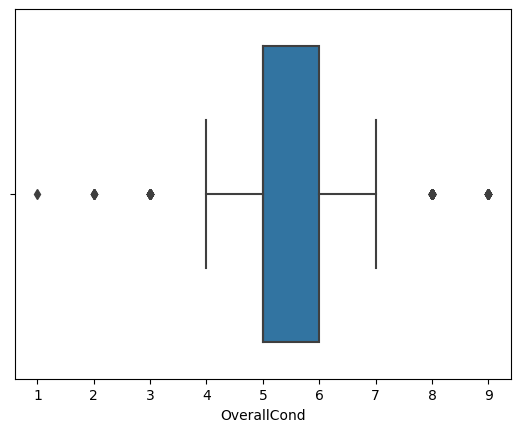

In [23]:
sns.boxplot(x=df["OverallCond"])

# Se observan que hay datos atípicos

2.-¿En qué variables identifica un tipo de sesgo? Usar histogramas

Notas: 
* Sesgo positivo es a la derecha (cargado a la izquierda)
* Sesgo negativo es a la izquierda (cargado a la derecha).

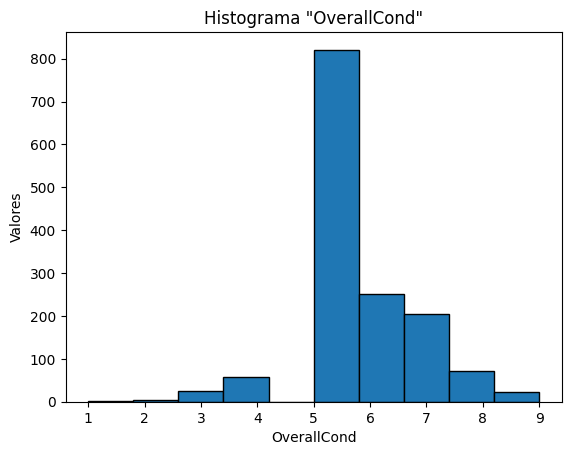

In [24]:
plt.hist(df["OverallCond"], edgecolor='black')  # You can adjust the number of bins
plt.xlabel('OverallCond')
plt.ylabel('Valores')
plt.title('Histograma "OverallCond"')
plt.show()

#Se observa que sigue una distribución con sesgo negativo

3.-¿Sigue una distribución normal cada variable numérica? Usar prueba de Anderson Darling

In [25]:
# Prueba de Anderson-Darling
resultado = anderson(df["OverallCond"])
print("Estadística de prueba:", resultado.statistic)
print("Valores críticos:", resultado.critical_values)
print("Niveles de significancia:", resultado.significance_level)

if resultado.statistic < resultado.critical_values[2]:
    print("Distribución normal")
else:
    print("No sigue distribución normal")

Estadística de prueba: 125.28514379301168
Valores críticos: [0.574 0.654 0.785 0.916 1.089]
Niveles de significancia: [15.  10.   5.   2.5  1. ]
No sigue distribución normal


4.-¿Qué medida de tendencia central describe mejor a la variable y por qué? (media o mediana)

Notas:
* Si se sigue una distribución normal entonces la media y mediana es lo mismo, por lo que se puede elegir cualquier tendencia para describir a la variable.
* Si no se sigue una distribución normal entonces la media no aporta información relevante (genera ruido), por lo tanto la tendencia central que describe mejor a la variable es la "mediana" debido a que representa la mitad de los valores intrínsecos.

In [26]:
print("Media:",statistics.mean(df["OverallCond"]))
print("Mediana:",statistics.median(df["OverallCond"]))

Media: 5.575342465753424
Mediana: 5.0


Debido a que la variable no sigue una distribución normal, la medida de tendencia central que mejor describe a la variable es la **mediana**.

5.-¿Qué medida de variabilidad describe mejor a cada variable numérica y por qué? (desviación o rango intercuartil)

Notas:
* Si se sigue una distribución normal, entonces se ocupa una desviación estándar.
* Si no se sigue una distribución normal, entonces acompaña a la mediadana. Es decir, se ocupa como medida de vairiabilidad el rando intercuartil.

In [27]:
statistics.stdev(df["OverallCond"])

1.1127993367127318

In [28]:
iqr(df["OverallCond"])

1.0

En este caso, debido a que la medida de tendencia que se seleccionó es la mediana, la medida de variabilidad que mejor describe a cada variable es el **rango intercuartil** que para este caso es 1.0

#  YearBuilt

1.-¿Qué variables presentan datos atípicos? Para este punto utilizar Bloxplots

<Axes: xlabel='YearBuilt'>

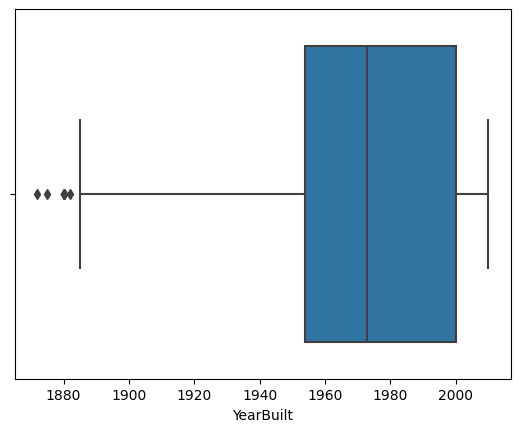

In [29]:
sns.boxplot(x=df['YearBuilt'])

# Se observan valores atípicos

2.-¿En qué variables identifica un tipo de sesgo? Usar histogramas

Notas: 
* Sesgo positivo es a la derecha (cargado a la izquierda)
* Sesgo negativo es a la izquierda (cargado a la derecha).

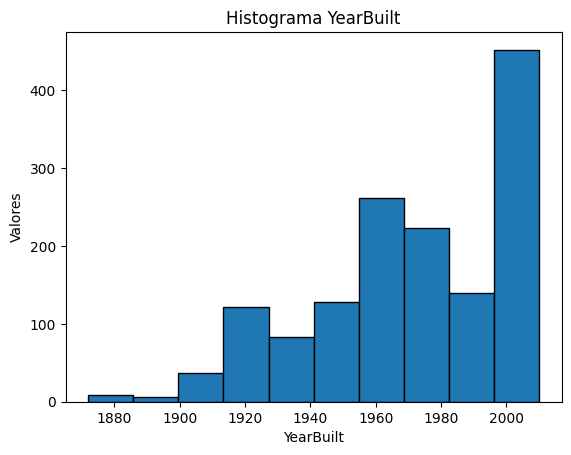

In [30]:
plt.hist(df['YearBuilt'], edgecolor='black')  # You can adjust the number of bins
plt.xlabel('YearBuilt')
plt.ylabel('Valores')
plt.title('Histograma YearBuilt')
plt.show()

#Se puede observar que en la variable hay un sesgo negativo al estar a la izquierda

3.-¿Sigue una distribución normal cada variable numérica? Usar prueba de Anderson Darling

In [31]:
# Prueba de Anderson-Darling
resultado = anderson(df['YearBuilt'])
print("Estadística de prueba:", resultado.statistic)
print("Valores críticos:", resultado.critical_values)
print("Niveles de significancia:", resultado.significance_level)

if resultado.statistic < resultado.critical_values[2]:
    print("Distribución normal")
else:
    print("No sigue distribución normal")

Estadística de prueba: 30.963522767426184
Valores críticos: [0.574 0.654 0.785 0.916 1.089]
Niveles de significancia: [15.  10.   5.   2.5  1. ]
No sigue distribución normal


4.-¿Qué medida de tendencia central describe mejor a la variable y por qué? (media o mediana)

Notas:
* Si se sigue una distribución normal entonces la media y mediana es lo mismo, por lo que se puede elegir cualquier tendencia para describir a la variable.
* Si no se sigue una distribución normal entonces la media no aporta información relevante (genera ruido), por lo tanto la tendencia central que describe mejor a la variable es la "mediana" debido a que representa la mitad de los valores intrínsecos.

In [32]:
print("Media:",statistics.mean(df['YearBuilt']))
print("Mediana:",statistics.median(df['YearBuilt']))

Media: 1971.267808219178
Mediana: 1973.0


Debido a que la variable no sigue una distribución normal, la medida de tendencia central que mejor describe a la variable es la **mediana**.

5.-¿Qué medida de variabilidad describe mejor a cada variable numérica y por qué? (desviación o rango intercuartil)

Notas:
* Si se sigue una distribución normal, entonces se ocupa una desviación estándar.
* Si no se sigue una distribución normal, entonces acompaña a la mediadana. Es decir, se ocupa como medida de vairiabilidad el rando intercuartil.

In [33]:
statistics.stdev(df['YearBuilt'])

30.202904042525258

In [34]:
iqr(df['YearBuilt'])

46.0

En este caso, debido a que la medida de tendencia que se seleccionó es la mediana, la medida de variabilidad que mejor describe a cada variable es el **rango intercuartil** que para este caso es 48.0

#  YearRemodAdd

1.-¿Qué variables presentan datos atípicos? Para este punto utilizar Bloxplots

<Axes: xlabel='YearRemodAdd'>

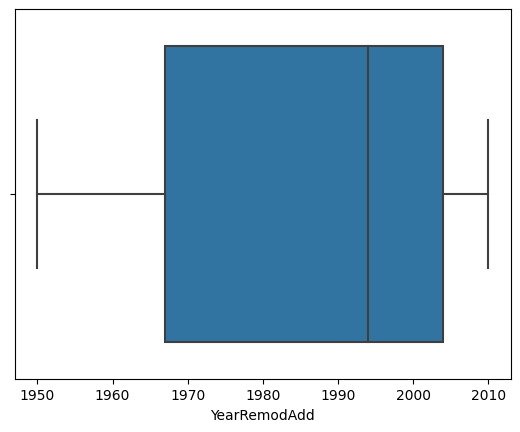

In [35]:
sns.boxplot(x=df['YearRemodAdd'])

#Se puede observar que no hay datos atípicos

2.-¿En qué variables identifica un tipo de sesgo? Usar histogramas

Notas: 
* Sesgo positivo es a la derecha (cargado a la izquierda)
* Sesgo negativo es a la izquierda (cargado a la derecha).

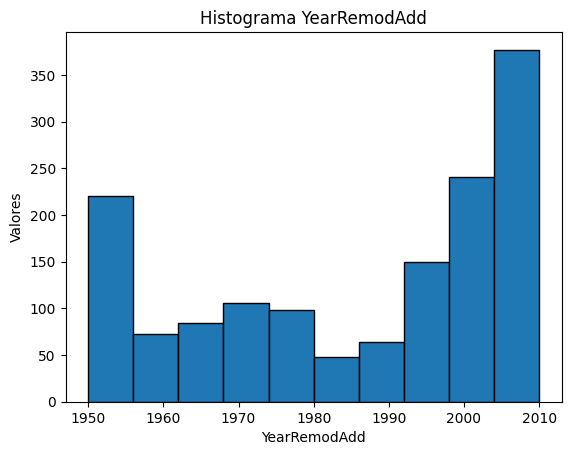

In [36]:
plt.hist(df['YearRemodAdd'], edgecolor='black')  # You can adjust the number of bins
plt.xlabel('YearRemodAdd')
plt.ylabel('Valores')
plt.title('Histograma YearRemodAdd')
plt.show()

# Se puede observar que hay un sesgo negativo la cual es a la izquierda

3.-¿Sigue una distribución normal cada variable numérica? Usar prueba de Anderson Darling

In [37]:
# Prueba de Anderson-Darling
resultado = anderson(df['YearRemodAdd'])
print("Estadística de prueba:", resultado.statistic)
print("Valores críticos:", resultado.critical_values)
print("Niveles de significancia:", resultado.significance_level)

if resultado.statistic < resultado.critical_values[2]:
    print("Distribución normal")
else:
    print("No sigue distribución normal")

Estadística de prueba: 71.49440205330257
Valores críticos: [0.574 0.654 0.785 0.916 1.089]
Niveles de significancia: [15.  10.   5.   2.5  1. ]
No sigue distribución normal


4.-¿Qué medida de tendencia central describe mejor a la variable y por qué? (media o mediana)

Notas:
* Si se sigue una distribución normal entonces la media y mediana es lo mismo, por lo que se puede elegir cualquier tendencia para describir a la variable.
* Si no se sigue una distribución normal entonces la media no aporta información relevante (genera ruido), por lo tanto la tendencia central que describe mejor a la variable es la "mediana" debido a que representa la mitad de los valores intrínsecos.

In [38]:
print("Media:",statistics.mean(df['YearRemodAdd']))
print("Mediana:",statistics.median(df['YearRemodAdd']))

Media: 1984.8657534246574
Mediana: 1994.0


Debido a que la variable no sigue una distribución normal, la medida de tendencia central que mejor describe a la variable es la **mediana**.

5.-¿Qué medida de variabilidad describe mejor a cada variable numérica y por qué? (desviación o rango intercuartil)

Notas:
* Si se sigue una distribución normal, entonces se ocupa una desviación estándar.
* Si no se sigue una distribución normal, entonces acompaña a la mediadana. Es decir, se ocupa como medida de vairiabilidad el rando intercuartil.

In [39]:
statistics.stdev(df['YearRemodAdd'])

20.645406807709413

In [40]:
iqr(df['YearRemodAdd'])

37.0

En este caso, debido a que la medida de tendencia que se seleccionó es la mediana, la medida de variabilidad que mejor describe a cada variable es el **rango intercuartil** que para este caso es 41.0

#  1stFlrSF

1.-¿Qué variables presentan datos atípicos? Para este punto utilizar Bloxplots

<Axes: xlabel='1stFlrSF'>

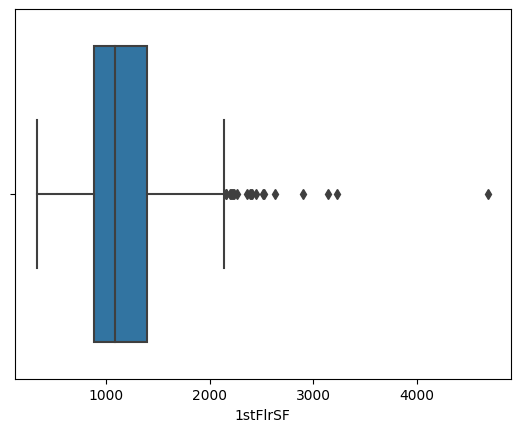

In [41]:
sns.boxplot(x=df['1stFlrSF'])

#Se puede observar que se encuentran datos atípicos

2.-¿En qué variables identifica un tipo de sesgo? Usar histogramas

Notas: 
* Sesgo positivo es a la derecha (cargado a la izquierda)
* Sesgo negativo es a la izquierda (cargado a la derecha).

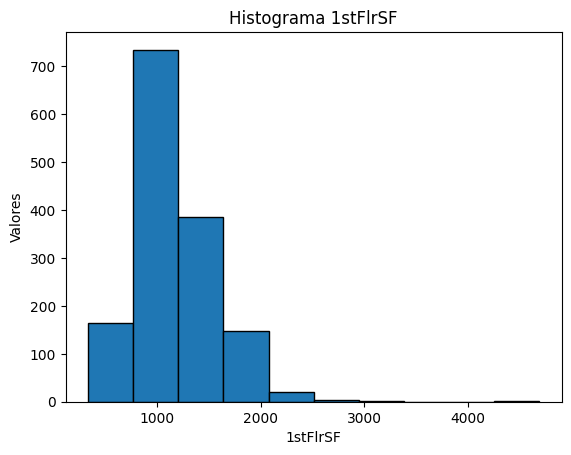

In [42]:
plt.hist(df['1stFlrSF'], edgecolor='black')  # You can adjust the number of bins
plt.xlabel('1stFlrSF')
plt.ylabel('Valores')
plt.title('Histograma 1stFlrSF')
plt.show()

#Se puede observar que en la variable se tiene un sesgo positivo

3.-¿Sigue una distribución normal cada variable numérica? Usar prueba de Anderson Darling

In [43]:
# Prueba de Anderson-Darling
resultado = anderson(df['1stFlrSF'])
print("Estadística de prueba:", resultado.statistic)
print("Valores críticos:", resultado.critical_values)
print("Niveles de significancia:", resultado.significance_level)

if resultado.statistic < resultado.critical_values[2]:
    print("Distribución normal")
else:
    print("No sigue distribución normal")

Estadística de prueba: 19.16505295807542
Valores críticos: [0.574 0.654 0.785 0.916 1.089]
Niveles de significancia: [15.  10.   5.   2.5  1. ]
No sigue distribución normal


4.-¿Qué medida de tendencia central describe mejor a la variable y por qué? (media o mediana)

Notas:
* Si se sigue una distribución normal entonces la media y mediana es lo mismo, por lo que se puede elegir cualquier tendencia para describir a la variable.
* Si no se sigue una distribución normal entonces la media no aporta información relevante (genera ruido), por lo tanto la tendencia central que describe mejor a la variable es la "mediana" debido a que representa la mitad de los valores intrínsecos.

In [44]:
print("Media:",statistics.mean(df['1stFlrSF']))
print("Mediana:",statistics.median(df['1stFlrSF']))

Media: 1162.626712328767
Mediana: 1087.0


Debido a que la variable no sigue una distribución normal, la medida de tendencia central que mejor describe a la variable es la **mediana**.

5.-¿Qué medida de variabilidad describe mejor a cada variable numérica y por qué? (desviación o rango intercuartil)

Notas:
* Si se sigue una distribución normal, entonces se ocupa una desviación estándar.
* Si no se sigue una distribución normal, entonces acompaña a la mediadana. Es decir, se ocupa como medida de vairiabilidad el rando intercuartil.

In [45]:
statistics.stdev(df['1stFlrSF'])

386.5877380410743

In [46]:
iqr(df['1stFlrSF'])

509.25

En este caso, debido a que la medida de tendencia que se seleccionó es la mediana, la medida de variabilidad que mejor describe a cada variable es el **rango intercuartil** que para este caso es 509.0

# 2ndFlrSF

1.-¿Qué variables presentan datos atípicos? Para este punto utilizar Bloxplots

<Axes: xlabel='2ndFlrSF'>

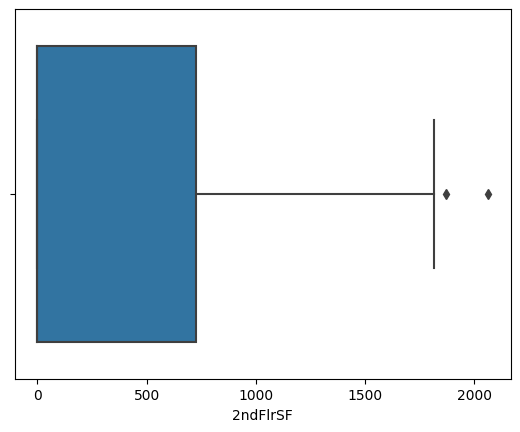

In [47]:
sns.boxplot(x=df["2ndFlrSF"])

2.-¿En qué variables identifica un tipo de sesgo? Usar histogramas

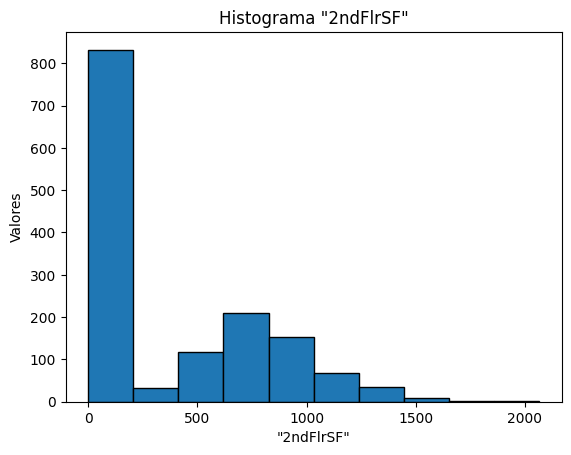

In [48]:
plt.hist(df["2ndFlrSF"], edgecolor='black') 
plt.xlabel('"2ndFlrSF"')
plt.ylabel('Valores')
plt.title('Histograma "2ndFlrSF"')
plt.show()

 Sesgo positivo es a la derecha (cargado a la izquierda)

3.-¿Sigue una distribución normal cada variable numérica? Usar prueba de Anderson Darling

In [49]:
# Prueba de Anderson-Darling
resultado = anderson(df["2ndFlrSF"])
print("Estadística de prueba:", resultado.statistic)
print("Valores críticos:", resultado.critical_values)
print("Niveles de significancia:", resultado.significance_level)

if resultado.statistic < resultado.critical_values[2]:
    print("Distribución normal")
else:
    print("No sigue distribución normal")

Estadística de prueba: 154.96553431401026
Valores críticos: [0.574 0.654 0.785 0.916 1.089]
Niveles de significancia: [15.  10.   5.   2.5  1. ]
No sigue distribución normal


4.-¿Qué medida de tendencia central describe mejor a la variable y por qué? (media o mediana)

In [50]:
print("Mediana:",statistics.median(df["2ndFlrSF"]))

Mediana: 0.0


Debido a que la variable no sigue una distribución normal, la medida de tendencia central que mejor describe a la variable es la **mediana**.

In [51]:
iqr(df["2ndFlrSF"])

728.0

En este caso, debido a que la medida de tendencia que se seleccionó es la mediana, la medida de variabilidad que mejor describe a cada variable es el **rango intercuartil** que para este caso es 676.0

# LowQualFinSF

1.-¿Qué variables presentan datos atípicos? Para este punto utilizar Bloxplots

<Axes: xlabel='LowQualFinSF'>

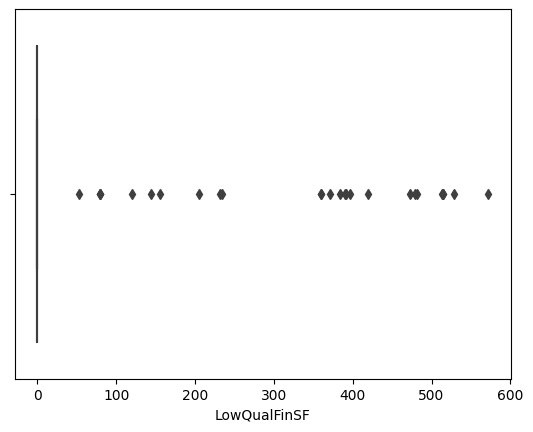

In [52]:
sns.boxplot(x=df["LowQualFinSF"])

2.-¿En qué variables identifica un tipo de sesgo? Usar histogramas

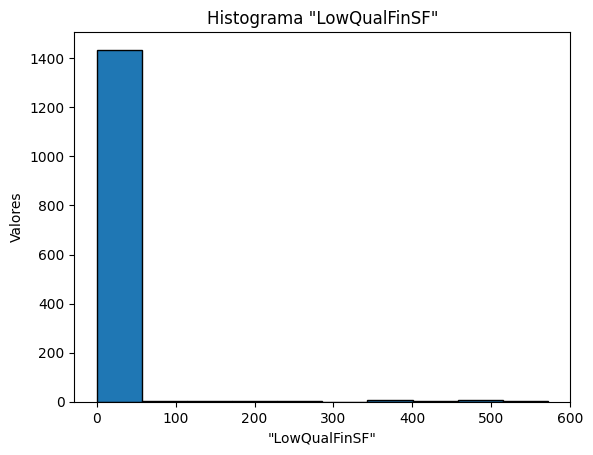

In [53]:
plt.hist(df["LowQualFinSF"], edgecolor='black')  
plt.xlabel('"LowQualFinSF"')
plt.ylabel('Valores')
plt.title('Histograma "LowQualFinSF"')
plt.show()

3.-¿Sigue una distribución normal cada variable numérica? Usar prueba de Anderson Darling

In [54]:
# Prueba de Anderson-Darling
resultado = anderson(df["LowQualFinSF"])
print("Estadística de prueba:", resultado.statistic)
print("Valores críticos:", resultado.critical_values)
print("Niveles de significancia:", resultado.significance_level)

if resultado.statistic < resultado.critical_values[2]:
    print("Distribución normal")
else:
    print("No sigue distribución normal")

Estadística de prueba: 545.3776823326475
Valores críticos: [0.574 0.654 0.785 0.916 1.089]
Niveles de significancia: [15.  10.   5.   2.5  1. ]
No sigue distribución normal


4.-¿Qué medida de tendencia central describe mejor a la variable y por qué? (media o mediana)

In [55]:
print("Mediana:",statistics.median(df["LowQualFinSF"]))

Mediana: 0.0


Debido a que la variable no sigue una distribución normal, la medida de tendencia central que mejor describe a la variable es la **mediana**.

5.-¿Qué medida de variabilidad describe mejor a cada variable numérica y por qué? (desviación o rango intercuartil)

In [56]:
iqr(df["LowQualFinSF"])

0.0

En este caso, debido a que la medida de tendencia que se seleccionó es la mediana, la medida de variabilidad que mejor describe a cada variable es el **rango intercuartil** que para este caso es 0.0

# GrLivArea

1.-¿Qué variables presentan datos atípicos? Para este punto utilizar Bloxplots

<Axes: xlabel='GrLivArea'>

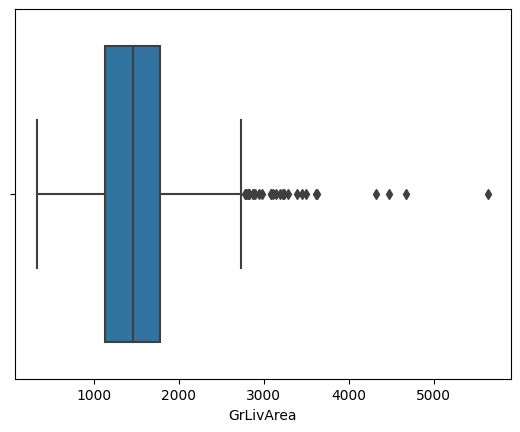

In [57]:
sns.boxplot(x=df["GrLivArea"])

2.-¿En qué variables identifica un tipo de sesgo? Usar histogramas

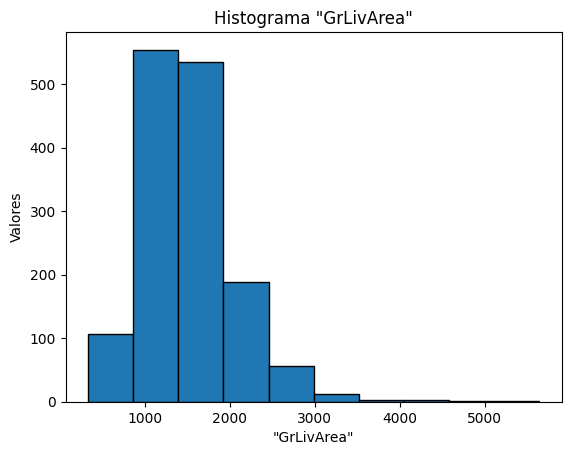

In [58]:
plt.hist(df["GrLivArea"], edgecolor='black')  
plt.xlabel('"GrLivArea"')
plt.ylabel('Valores')
plt.title('Histograma "GrLivArea"')
plt.show()

3.-¿Sigue una distribución normal cada variable numérica? Usar prueba de Anderson Darling

In [59]:
# Prueba de Anderson-Darling
resultado = anderson(df["GrLivArea"])
print("Estadística de prueba:", resultado.statistic)
print("Valores críticos:", resultado.critical_values)
print("Niveles de significancia:", resultado.significance_level)

if resultado.statistic < resultado.critical_values[2]:
    print("Distribución normal")
else:
    print("No sigue distribución normal")

Estadística de prueba: 14.532232080317044
Valores críticos: [0.574 0.654 0.785 0.916 1.089]
Niveles de significancia: [15.  10.   5.   2.5  1. ]
No sigue distribución normal


4.-¿Qué medida de tendencia central describe mejor a la variable y por qué? (media o mediana)

In [60]:
print("Mediana:",statistics.median(df["GrLivArea"]))

Mediana: 1464.0


Debido a que la variable no sigue una distribución normal, la medida de tendencia central que mejor describe a la variable es la **mediana**.

5.-¿Qué medida de variabilidad describe mejor a cada variable numérica y por qué? (desviación o rango intercuartil)

In [61]:
iqr(df["GrLivArea"])

647.25

En este caso, debido a que la medida de tendencia que se seleccionó es la mediana, la medida de variabilidad que mejor describe a cada variable es el **rango intercuartil** que para este caso es 603.5

# FullBath

1.-¿Qué variables presentan datos atípicos? Para este punto utilizar Bloxplots

<Axes: xlabel='FullBath'>

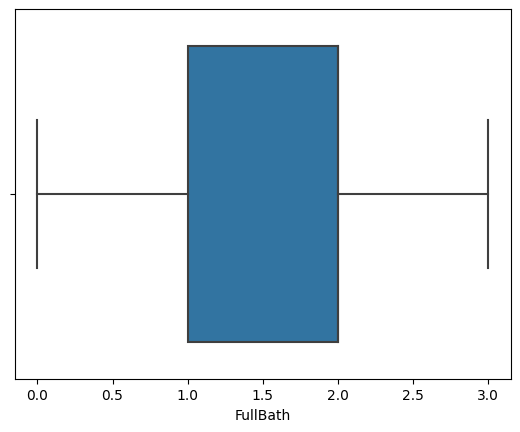

In [62]:
sns.boxplot(x=df["FullBath"])

2.-¿En qué variables identifica un tipo de sesgo? Usar histogramas

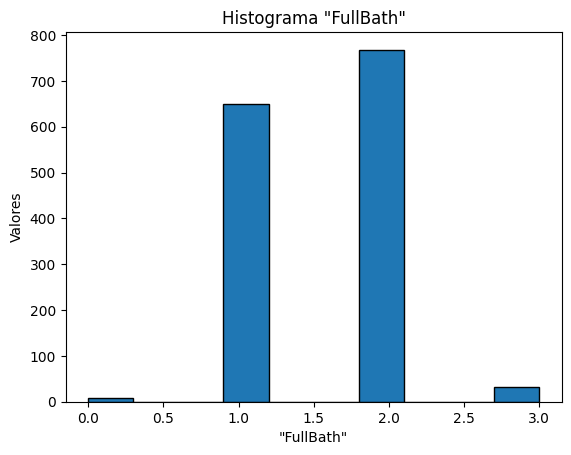

In [63]:
plt.hist(df["FullBath"], edgecolor='black')  
plt.xlabel('"FullBath"')
plt.ylabel('Valores')
plt.title('Histograma "FullBath"')
plt.show()

3.-¿Sigue una distribución normal cada variable numérica? Usar prueba de Anderson Darling

In [64]:
# Prueba de Anderson-Darling

resultado = anderson(df["FullBath"])

print("Estadística de prueba:", resultado.statistic)
print("Valores críticos:", resultado.critical_values)
print("Niveles de significancia:", resultado.significance_level)

if resultado.statistic < resultado.critical_values[2]:
    print("Distribución normal")
else:
    print("No sigue distribución normal")

Estadística de prueba: 209.87649132980368
Valores críticos: [0.574 0.654 0.785 0.916 1.089]
Niveles de significancia: [15.  10.   5.   2.5  1. ]
No sigue distribución normal


4.-¿Qué medida de tendencia central describe mejor a la variable y por qué? (media o mediana)

In [65]:
print("Mediana:",statistics.median(df["FullBath"]))

Mediana: 2.0


Debido a que la variable no sigue una distribución normal, la medida de tendencia central que mejor describe a la variable es la **mediana**.

5.-¿Qué medida de variabilidad describe mejor a cada variable numérica y por qué? (desviación o rango intercuartil)

In [66]:
iqr(df["FullBath"])

1.0

En este caso, debido a que la medida de tendencia que se seleccionó es la mediana, la medida de variabilidad que mejor describe a cada variable es el **rango intercuartil** que para este caso es 1.0

# HalfBath

1.-¿Qué variables presentan datos atípicos? Para este punto utilizar Bloxplots

<Axes: xlabel='HalfBath'>

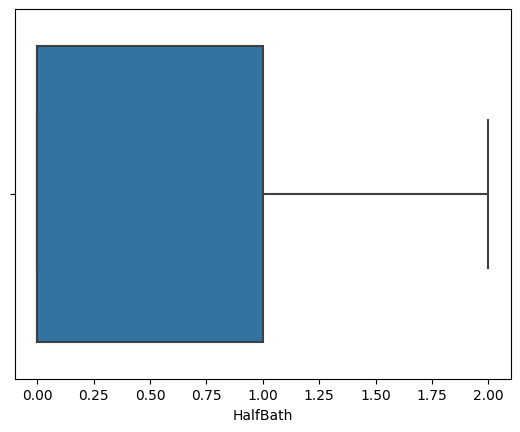

In [67]:
sns.boxplot(x=df["HalfBath"])

2.-¿En qué variables identifica un tipo de sesgo? Usar histogramas

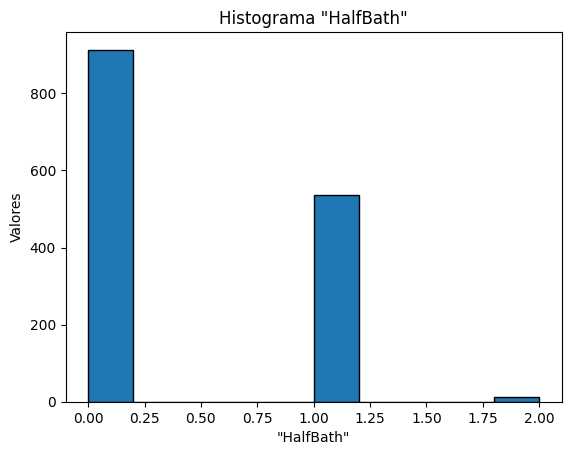

In [68]:
plt.hist(df["HalfBath"], edgecolor='black')  # You can adjust the number of bins
plt.xlabel('"HalfBath"')
plt.ylabel('Valores')
plt.title('Histograma "HalfBath"')
plt.show()

3.-¿Sigue una distribución normal cada variable numérica? Usar prueba de Anderson Darling

In [69]:
# Prueba de Anderson-Darling
resultado = anderson(df["HalfBath"])
print("Estadística de prueba:", resultado.statistic)
print("Valores críticos:", resultado.critical_values)
print("Niveles de significancia:", resultado.significance_level)

if resultado.statistic < resultado.critical_values[2]:
    print("Distribución normal")
else:
    print("No sigue distribución normal")

Estadística de prueba: 267.0045184059886
Valores críticos: [0.574 0.654 0.785 0.916 1.089]
Niveles de significancia: [15.  10.   5.   2.5  1. ]
No sigue distribución normal


4.-¿Qué medida de tendencia central describe mejor a la variable y por qué? (media o mediana)

In [70]:
print("Mediana:",statistics.median(df["HalfBath"]))

Mediana: 0.0


Debido a que la variable no sigue una distribución normal, la medida de tendencia central que mejor describe a la variable es la **mediana**.

5.-¿Qué medida de variabilidad describe mejor a cada variable numérica y por qué? (desviación o rango intercuartil)

In [71]:
iqr(df["HalfBath"])

1.0

En este caso, debido a que la medida de tendencia que se seleccionó es la mediana, la medida de variabilidad que mejor describe a cada variable es el **rango intercuartil** que para este caso es 1.0

# BedroomAbvGr

1.-¿Qué variables presentan datos atípicos? Para este punto utilizar Bloxplots

<Axes: xlabel='BedroomAbvGr'>

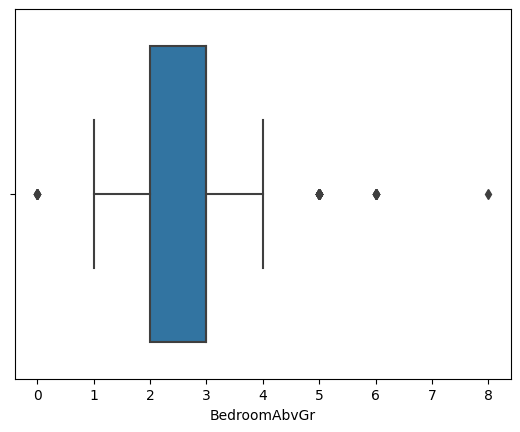

In [72]:
sns.boxplot(x=df["BedroomAbvGr"])

2.-¿En qué variables identifica un tipo de sesgo? Usar histogramas

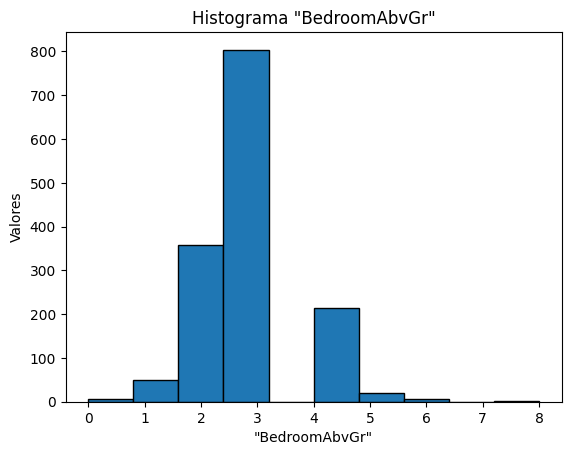

In [73]:
plt.hist(df["BedroomAbvGr"], edgecolor='black')  # You can adjust the number of bins
plt.xlabel('"BedroomAbvGr"')
plt.ylabel('Valores')
plt.title('Histograma "BedroomAbvGr"')
plt.show()

3.-¿Sigue una distribución normal cada variable numérica? Usar prueba de Anderson Darling

In [74]:
# Prueba de Anderson-Darling
resultado = anderson(df["BedroomAbvGr"])
print("Estadística de prueba:", resultado.statistic)
print("Valores críticos:", resultado.critical_values)
print("Niveles de significancia:", resultado.significance_level)

if resultado.statistic < resultado.critical_values[2]:
    print("Distribución normal")
else:
    print("No sigue distribución normal")

Estadística de prueba: 106.54827154139502
Valores críticos: [0.574 0.654 0.785 0.916 1.089]
Niveles de significancia: [15.  10.   5.   2.5  1. ]
No sigue distribución normal


4.-¿Qué medida de tendencia central describe mejor a la variable y por qué? (media o mediana)

In [75]:
print("Mediana:",statistics.median(df["BedroomAbvGr"]))

Mediana: 3.0


Debido a que la variable no sigue una distribución normal, la medida de tendencia central que mejor describe a la variable es la **mediana**.

5.-¿Qué medida de variabilidad describe mejor a cada variable numérica y por qué? (desviación o rango intercuartil)

In [76]:
iqr(df["BedroomAbvGr"])

1.0

# 3SsnPorch

1.-¿Qué variables presentan datos atípicos? Para este punto utilizar Bloxplots

<Axes: xlabel='3SsnPorch'>

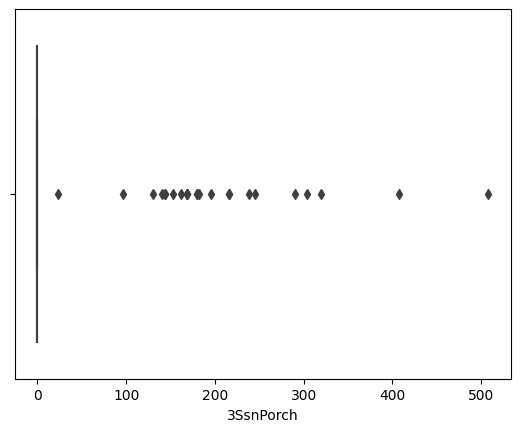

In [77]:
sns.boxplot(x=df["3SsnPorch"])

De acuerdo a la visualización del Bloxplot, se nota que la variable 3SsnPorch <strong>sí</strong> presenta datos atípicos.

2.-¿En qué variables identifica un tipo de sesgo? Usar histogramas

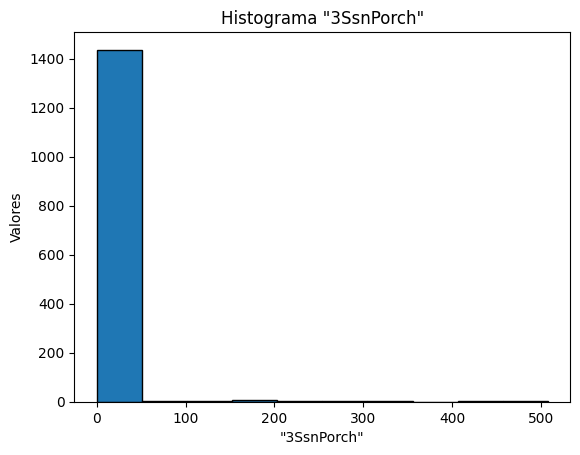

In [78]:
plt.hist(df["3SsnPorch"], edgecolor='black')  # You can adjust the number of bins
plt.xlabel('"3SsnPorch"')
plt.ylabel('Valores')
plt.title('Histograma "3SsnPorch"')
plt.show()

De acuerdo a la visualización del Histograma, se nota que la variable 3SsnPorch <strong>sí</strong> presenta un leve sesgo positivo.

3.-¿Sigue una distribución normal cada variable numérica? Usar prueba de Anderson Darling

In [79]:
# Prueba de Anderson-Darling
resultado = anderson(df["3SsnPorch"])
print("Estadística de prueba:", resultado.statistic)
print("Valores críticos:", resultado.critical_values)
print("Niveles de significancia:", resultado.significance_level)

if resultado.statistic < resultado.critical_values[2]:
    print("Distribución normal")
else:
    print("No sigue distribución normal")

Estadística de prueba: 546.4889858524525
Valores críticos: [0.574 0.654 0.785 0.916 1.089]
Niveles de significancia: [15.  10.   5.   2.5  1. ]
No sigue distribución normal


4.-¿Qué medida de tendencia central describe mejor a la variable y por qué? (media o mediana)

Notas:
* Si se sigue una distribución normal entonces la media y mediana es lo mismo, por lo que se puede elegir cualquier tendencia para describir a la variable.
* Si no se sigue una distribución normal entonces la media no aporta información relevante (genera ruido), por lo tanto la tendencia central que describe mejor a la variable es la "mediana" debido a que representa la mitad de los valores intrínsecos.

In [80]:
print("Media:",statistics.mean(df["3SsnPorch"]))
print("Mediana:",statistics.median(df["3SsnPorch"]))

Media: 3.4095890410958902
Mediana: 0.0


Debido a que la variable no sigue una distribución normal, la medida de tendencia central que mejor describe a la variable es la **mediana**.

5.-¿Qué medida de variabilidad describe mejor a cada variable numérica y por qué? (desviación o rango intercuartil)

Notas:
* Si se sigue una distribución normal, entonces se ocupa una desviación estándar.
* Si no se sigue una distribución normal, entonces acompaña a la mediana. Es decir, se ocupa como medida de variabilidad el rango intercuartil.

In [81]:
statistics.stdev(df["3SsnPorch"])

29.317330556781883

In [82]:
iqr(df["3SsnPorch"])

0.0

En este caso, debido a que la medida de tendencia que se seleccionó es la mediana, la medida de variabilidad que mejor describe a cada variable es el **rango intercuartil** que para este caso es 0.0

# ScreenPorch

1.-¿Qué variables presentan datos atípicos? Para este punto utilizar Bloxplots

<Axes: xlabel='ScreenPorch'>

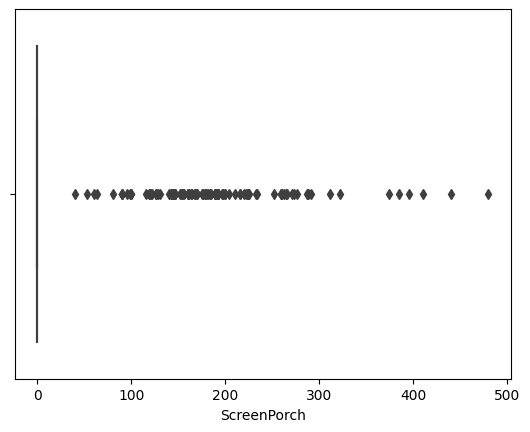

In [83]:
sns.boxplot(x=df["ScreenPorch"])

De acuerdo a la visualización del Boxplot, se nota que la variable ScreenPorch <strong>sí</strong> presenta datos atípicos.

2.-¿En qué variables identifica un tipo de sesgo? Usar histogramas

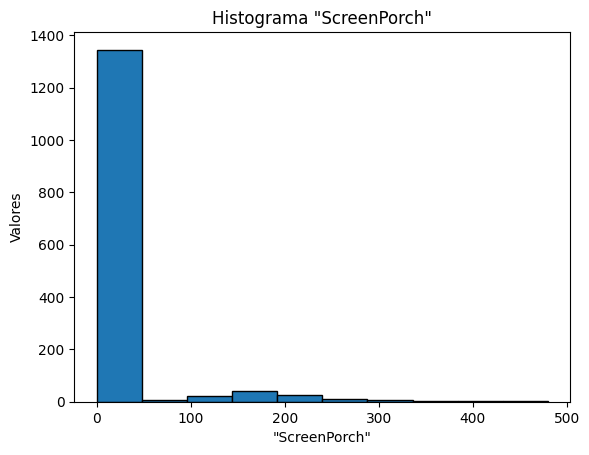

In [84]:
plt.hist(df["ScreenPorch"], edgecolor='black')  # You can adjust the number of bins
plt.xlabel('"ScreenPorch"')
plt.ylabel('Valores')
plt.title('Histograma "ScreenPorch"')
plt.show()

De acuerdo a la visualización del Histograma, se nota que la variable ScreenPorch <strong>sí</strong> presenta un leve sesgo positivo.

3.-¿Sigue una distribución normal cada variable numérica? Usar prueba de Anderson Darling

In [85]:
# Prueba de Anderson-Darling
resultado = anderson(df["ScreenPorch"])
print("Estadística de prueba:", resultado.statistic)
print("Valores críticos:", resultado.critical_values)
print("Niveles de significancia:", resultado.significance_level)

if resultado.statistic < resultado.critical_values[2]:
    print("Distribución normal")
else:
    print("No sigue distribución normal")

Estadística de prueba: 471.2485450574152
Valores críticos: [0.574 0.654 0.785 0.916 1.089]
Niveles de significancia: [15.  10.   5.   2.5  1. ]
No sigue distribución normal


4.-¿Qué medida de tendencia central describe mejor a la variable y por qué? (media o mediana)

Notas:
* Si se sigue una distribución normal entonces la media y mediana es lo mismo, por lo que se puede elegir cualquier tendencia para describir a la variable.
* Si no se sigue una distribución normal entonces la media no aporta información relevante (genera ruido), por lo tanto la tendencia central que describe mejor a la variable es la "mediana" debido a que representa la mitad de los valores intrínsecos.

In [86]:
print("Media:",statistics.mean(df["ScreenPorch"]))
print("Mediana:",statistics.median(df["ScreenPorch"]))

Media: 15.060958904109588
Mediana: 0.0


Debido a que la variable no sigue una distribución normal, la medida de tendencia central que mejor describe a la variable es la **mediana**.

5.-¿Qué medida de variabilidad describe mejor a cada variable numérica y por qué? (desviación o rango intercuartil)

Notas:
* Si se sigue una distribución normal, entonces se ocupa una desviación estándar.
* Si no se sigue una distribución normal, entonces acompaña a la mediana. Es decir, se ocupa como medida de variabilidad el rango intercuartil.

In [87]:
statistics.stdev(df["ScreenPorch"])

55.75741528187418

In [88]:
iqr(df["ScreenPorch"])

0.0

En este caso, debido a que la medida de tendencia que se seleccionó es la mediana, la medida de variabilidad que mejor describe a cada variable es el **rango intercuartil** que para este caso es 0.0

# PoolArea

1.-¿Qué variables presentan datos atípicos? Para este punto utilizar Bloxplots

<Axes: xlabel='PoolArea'>

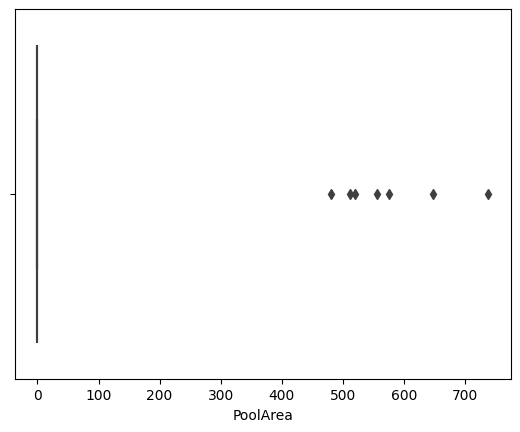

In [89]:
sns.boxplot(x=df["PoolArea"])

De acuerdo a la visualización del Boxplot, se nota que la variable PoolArea <strong>sí</strong> presenta datos atípicos.

2.-¿En qué variables identifica un tipo de sesgo? Usar histogramas

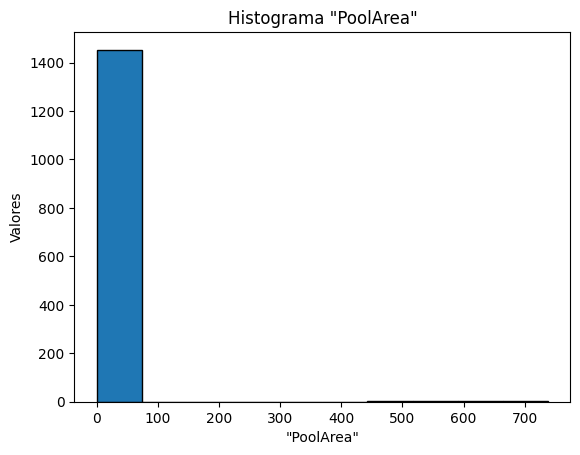

In [90]:
plt.hist(df["PoolArea"], edgecolor='black')  # You can adjust the number of bins
plt.xlabel('"PoolArea"')
plt.ylabel('Valores')
plt.title('Histograma "PoolArea"')
plt.show()

De acuerdo a la visualización del Histograma, se nota que la variable PoolArea <strong>sí</strong> presenta un leve sesgo positivo.

3.-¿Sigue una distribución normal cada variable numérica? Usar prueba de Anderson Darling

In [91]:
# Prueba de Anderson-Darling
resultado = anderson(df["PoolArea"])
print("Estadística de prueba:", resultado.statistic)
print("Valores críticos:", resultado.critical_values)
print("Niveles de significancia:", resultado.significance_level)

if resultado.statistic < resultado.critical_values[2]:
    print("Distribución normal")
else:
    print("No sigue distribución normal")

Estadística de prueba: 560.9242716744591
Valores críticos: [0.574 0.654 0.785 0.916 1.089]
Niveles de significancia: [15.  10.   5.   2.5  1. ]
No sigue distribución normal


4.-¿Qué medida de tendencia central describe mejor a la variable y por qué? (media o mediana)

Notas:
* Si se sigue una distribución normal entonces la media y mediana es lo mismo, por lo que se puede elegir cualquier tendencia para describir a la variable.
* Si no se sigue una distribución normal entonces la media no aporta información relevante (genera ruido), por lo tanto la tendencia central que describe mejor a la variable es la "mediana" debido a que representa la mitad de los valores intrínsecos.

In [92]:
print("Media:",statistics.mean(df["PoolArea"]))
print("Mediana:",statistics.median(df["PoolArea"]))

Media: 2.758904109589041
Mediana: 0.0


Debido a que la variable no sigue una distribución normal, la medida de tendencia central que mejor describe a la variable es la **mediana**.

5.-¿Qué medida de variabilidad describe mejor a cada variable numérica y por qué? (desviación o rango intercuartil)

Notas:
* Si se sigue una distribución normal, entonces se ocupa una desviación estándar.
* Si no se sigue una distribución normal, entonces acompaña a la mediana. Es decir, se ocupa como medida de variabilidad el rango intercuartil.

In [93]:
statistics.stdev(df["PoolArea"])

40.17730694453019

In [94]:
iqr(df["PoolArea"])

0.0

En este caso, debido a que la medida de tendencia que se seleccionó es la mediana, la medida de variabilidad que mejor describe a cada variable es el **rango intercuartil** que para este caso es 0.0

# MiscVal

1.-¿Qué variables presentan datos atípicos? Para este punto utilizar Bloxplots

<Axes: xlabel='MiscVal'>

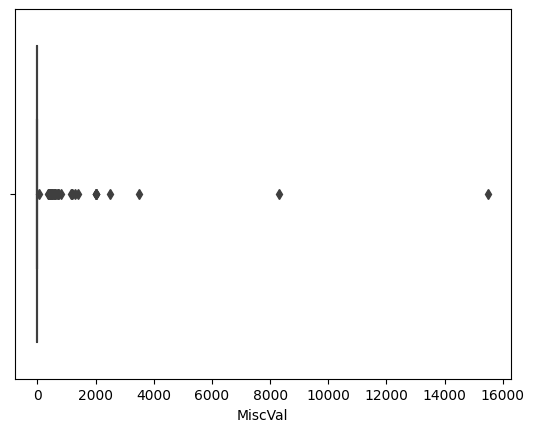

In [95]:
sns.boxplot(x=df["MiscVal"])

De acuerdo a la visualización del Boxplot, se nota que la variable MiscVal <strong>sí</strong> presenta datos atípicos.

2.-¿En qué variables identifica un tipo de sesgo? Usar histogramas

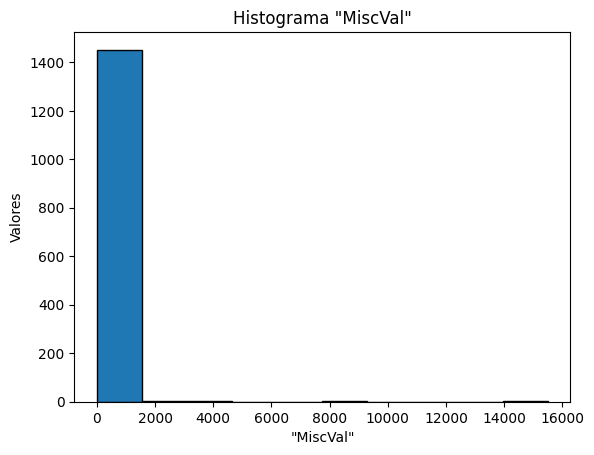

In [96]:
plt.hist(df["MiscVal"], edgecolor='black')  # You can adjust the number of bins
plt.xlabel('"MiscVal"')
plt.ylabel('Valores')
plt.title('Histograma "MiscVal"')
plt.show()

De acuerdo a la visualización del Histograma, se nota que la variable MiscVal <strong>sí</strong> presenta un leve sesgo positivo.

3.-¿Sigue una distribución normal cada variable numérica? Usar prueba de Anderson Darling

In [97]:
# Prueba de Anderson-Darling
resultado = anderson(df["MiscVal"])
print("Estadística de prueba:", resultado.statistic)
print("Valores críticos:", resultado.critical_values)
print("Niveles de significancia:", resultado.significance_level)

if resultado.statistic < resultado.critical_values[2]:
    print("Distribución normal")
else:
    print("No sigue distribución normal")

Estadística de prueba: 512.2841802502999
Valores críticos: [0.574 0.654 0.785 0.916 1.089]
Niveles de significancia: [15.  10.   5.   2.5  1. ]
No sigue distribución normal


4.-¿Qué medida de tendencia central describe mejor a la variable y por qué? (media o mediana)

Notas:
* Si se sigue una distribución normal entonces la media y mediana es lo mismo, por lo que se puede elegir cualquier tendencia para describir a la variable.
* Si no se sigue una distribución normal entonces la media no aporta información relevante (genera ruido), por lo tanto la tendencia central que describe mejor a la variable es la "mediana" debido a que representa la mitad de los valores intrínsecos.

In [98]:
print("Media:",statistics.mean(df["MiscVal"]))
print("Mediana:",statistics.median(df["MiscVal"]))

Media: 43.489041095890414
Mediana: 0.0


Debido a que la variable no sigue una distribución normal, la medida de tendencia central que mejor describe a la variable es la **mediana**.

5.-¿Qué medida de variabilidad describe mejor a cada variable numérica y por qué? (desviación o rango intercuartil)

Notas:
* Si se sigue una distribución normal, entonces se ocupa una desviación estándar.
* Si no se sigue una distribución normal, entonces acompaña a la mediana. Es decir, se ocupa como medida de variabilidad el rango intercuartil.

In [99]:
statistics.stdev(df["MiscVal"])

496.12302445794415

In [100]:
iqr(df["MiscVal"])

0.0

En este caso, debido a que la medida de tendencia que se seleccionó es la mediana, la medida de variabilidad que mejor describe a cada variable es el **rango intercuartil** que para este caso es 0.0

# MoSold

1.-¿Qué variables presentan datos atípicos? Para este punto utilizar Bloxplots

<Axes: xlabel='MoSold'>

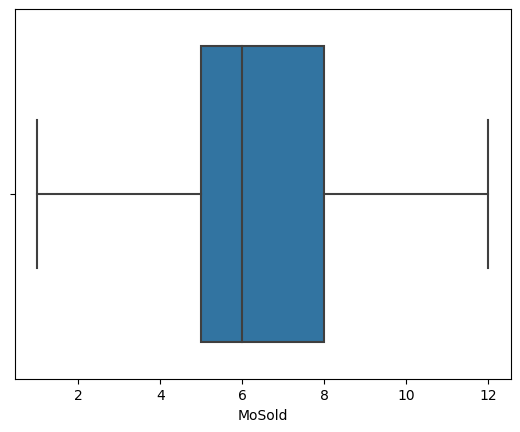

In [101]:
sns.boxplot(x=df["MoSold"])

De acuerdo a la visualización del Boxplot, se nota que la variable MoSold <strong>no</strong> presenta datos atípicos.

2.-¿En qué variables identifica un tipo de sesgo? Usar histogramas

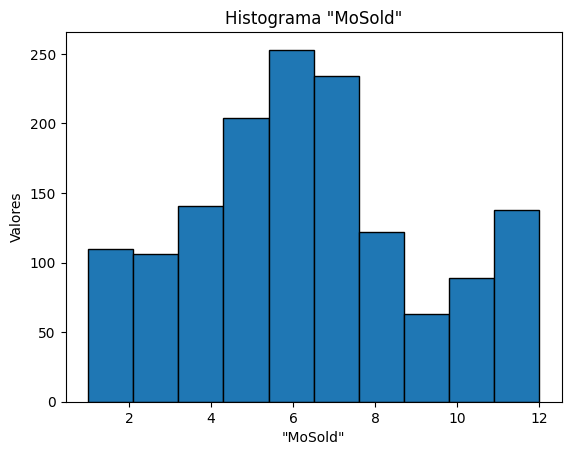

In [102]:
plt.hist(df["MoSold"], edgecolor='black')  # You can adjust the number of bins
plt.xlabel('"MoSold"')
plt.ylabel('Valores')
plt.title('Histograma "MoSold"')
plt.show()

De acuerdo a la visualización del Histograma, se nota que la variable MoSold <strong>sí</strong> presenta un muy leve sesgo positivo.

3.-¿Sigue una distribución normal cada variable numérica? Usar prueba de Anderson Darling

In [103]:
# Prueba de Anderson-Darlingresultado
resultado = anderson(df["MoSold"])
print("Estadística de prueba:", resultado.statistic)
print("Valores críticos:", resultado.critical_values)
print("Niveles de significancia:", resultado.significance_level)

if resultado.statistic < resultado.critical_values[2]:
    print("Distribución normal")
else:
    print("No sigue distribución normal")

Estadística de prueba: 14.53186137577677
Valores críticos: [0.574 0.654 0.785 0.916 1.089]
Niveles de significancia: [15.  10.   5.   2.5  1. ]
No sigue distribución normal


4.-¿Qué medida de tendencia central describe mejor a la variable y por qué? (media o mediana)

Notas:
* S  sesigue  unadist ribuciónnormal entonces la media oymediana es lo mismo , por lo que se puede elegir cualquier tendencia para describir a la variable.
* Si no se sigue una distribución normal entonces la media no aporta información relevante (genera ruido), por lo tanto la tendencia central que describe mejor a la variable es la "mediana" debido a que representa la mitad de los valores intrínsecos.

In [104]:
print("Media:",statistics.mean(df["MoSold"]))
print("Mediana:",statistics.median(df["MoSold"]))

Media: 6.321917808219178
Mediana: 6.0


Debido a que la variable no sigue una distribución normal, la medida de tendencia central que mejor describe a la variable es la **mediana**.

5.-¿Qué medida de variabilidad describe mejor a cada variable numérica y por qué? (desviación o rango intercuartil)

Notas:
 * Si se sigue una distribución normal, entonces se ocupa una desviación estándar.
 * Si no se sigue una distribución normal, entonces acompaña a la mediana. Es decir, se ocupa como medida de variabilidad el rango intercuartil.

In [105]:
statistics.stdev(df["MoSold"])

2.7036262083595126

In [106]:
iqr(df["MoSold"])

3.0

En este caso, debido a que la medida de tendencia que se seleccionó es la mediana, la medida de variabilidad que mejor describe a cada variable es el **rango intercuartil** que para este caso es 3.0

# YrSold

1.-¿Qué variables presentan datos atípicos? Para este punto utilizar Bloxplots

<Axes: xlabel='YrSold'>

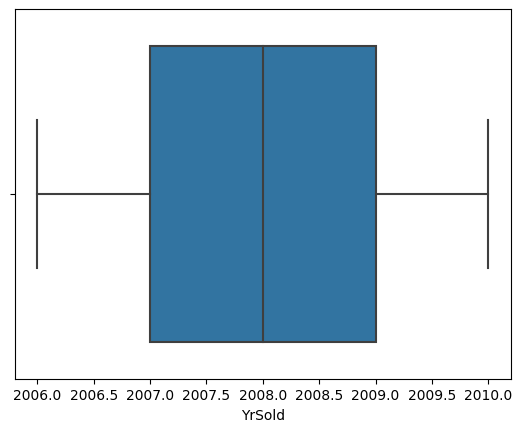

In [107]:
sns.boxplot(x=df["YrSold"])

De acuerdo a la visualización del Boxplot, se nota que la variable YrSold <strong>no</strong> presenta datos atípicos.

2.-¿En qué variables identifica un tipo de sesgo? Usar histogramas

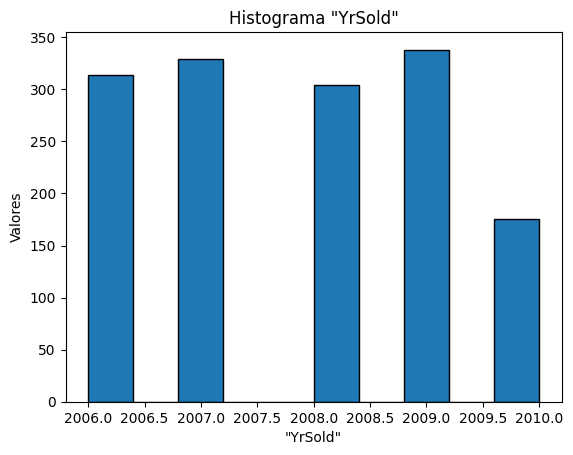

In [108]:
plt.hist(df["YrSold"], edgecolor='black')  # You can adjust the number of bins
plt.xlabel('"YrSold"')
plt.ylabel('Valores')
plt.title('Histograma "YrSold"')
plt.show()

De acuerdo a la visualización del Boxplot, se nota que la variable YrSold <strong>sí</strong> presenta un sesgo positivo, al igual que no cumple con una distribución normal.

3.-¿Sigue una distribución normal cada variable numérica? Usar prueba de Anderson Darling

In [109]:
# Prueba de Anderson-Darling
resultado = anderson(df["YrSold"])
print("Estadística de prueba:", resultado.statistic)
print("Valores críticos:", resultado.critical_values)
print("Niveles de significancia:", resultado.significance_level)

if resultado.statistic < resultado.critical_values[2]:
    print("Distribución normal")
else:
    print("No sigue distribución normal")

Estadística de prueba: 50.838257800872725
Valores críticos: [0.574 0.654 0.785 0.916 1.089]
Niveles de significancia: [15.  10.   5.   2.5  1. ]
No sigue distribución normal


4.-¿Qué medida de tendencia central describe mejor a la variable y por qué? (media o mediana)

Notas:
* Si se sigue una distribución normal entonces la media y mediana es lo mismo, por lo que se puede elegir cualquier tendencia para describir a la variable.
* Si no se sigue una distribución normal entonces la media no aporta información relevante (genera ruido), por lo tanto la tendencia central que describe mejor a la variable es la "mediana" debido a que representa la mitad de los valores intrínsecos.

In [110]:
print("Media:",statistics.mean(df["YrSold"]))
print("Mediana:",statistics.median(df["YrSold"]))

Media: 2007.8157534246575
Mediana: 2008.0


Debido a que la variable no sigue una distribución normal, la medida de tendencia central que mejor describe a la variable es la **mediana**.

5.-¿Qué medida de variabilidad describe mejor a cada variable numérica y por qué? (desviación o rango intercuartil)

Notas:
* Si se sigue una distribución normal, entonces se ocupa una desviación estándar.
* Si no se sigue una distribución normal, entonces acompaña a la mediana. Es decir, se ocupa como medida de variabilidad el rango intercuartil.

In [111]:
statistics.stdev(df["YrSold"])

1.3280951205521097

In [112]:
iqr(df["YrSold"])

2.0

En este caso, debido a que la medida de tendencia que se seleccionó es la mediana, la medida de variabilidad que mejor describe a cada variable es el **rango intercuartil** que para este caso es 2.0

# KitchenAbvGr

1.-¿Qué variables presentan datos atípicos? Para este punto utilizar Bloxplots

In [113]:
df["KitchenAbvGr"].value_counts()

KitchenAbvGr
1    1392
2      65
3       2
0       1
Name: count, dtype: int64

<Axes: xlabel='KitchenAbvGr'>

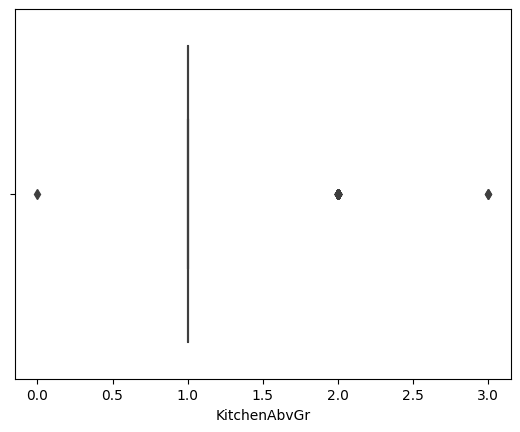

In [114]:
sns.boxplot(x=df["KitchenAbvGr"])


Se observa un dato atípico: 2

2.-¿En qué variables identifica un tipo de sesgo? Usar histogramas

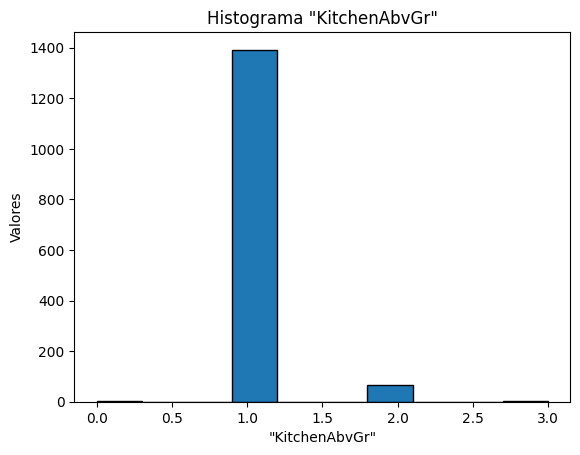

In [115]:
plt.hist(df["KitchenAbvGr"], edgecolor='black')  # You can adjust the number of bins
plt.xlabel('"KitchenAbvGr"')
plt.ylabel('Valores') 
plt.title('Histograma "KitchenAbvGr"')
plt.show()

No hay sesgo, aquì también se observan los outliers

3.-¿Sigue una distribución normal cada variable numérica? Usar prueba de Anderson Darling

In [116]:
# Prueba de Anderson-Darling
resultado = anderson(df["KitchenAbvGr"])
print("Estadística de prueba:", resultado.statistic)
print("Valores críticos:", resultado.critical_values)
print("Niveles de significancia:", resultado.significance_level)

if resultado.statistic < resultado.critical_values[2]:
    print("Distribución normal")
else:
    print("No sigue distribución normal")

Estadística de prueba: 524.3770719707998
Valores críticos: [0.574 0.654 0.785 0.916 1.089]
Niveles de significancia: [15.  10.   5.   2.5  1. ]
No sigue distribución normal


4.-¿Qué medida de tendencia central describe mejor a la variable y por qué? (media o mediana)

Notas:
* Si se sigue una distribución normal entonces la media y mediana es lo mismo, por lo que se puede elegir cualquier tendencia para describir a la variable.
* Si no se sigue una distribución normal entonces la media no aporta información relevante (genera ruido), por lo tanto la tendencia central que describe mejor a la variable es la "mediana" debido a que representa la mitad de los valores intrínsecos.

In [117]:
print("Media:",statistics.mean(df["KitchenAbvGr"]))
print("Mediana:",statistics.median(df["KitchenAbvGr"]))

Media: 1.0465753424657533
Mediana: 1.0


La medida de tendencia central que mejor describe a la variable es la **media**.

5.-¿Qué medida de variabilidad describe mejor a cada variable numérica y por qué? (desviación o rango intercuartil)

Notas:
* Si se sigue una distribución normal, entonces se ocupa una desviación estándar.
* Si no se sigue una distribución normal, entonces acompaña a la mediadana. Es decir, se ocupa como medida de vairiabilidad el rando intercuartil.

In [118]:
statistics.stdev(df["KitchenAbvGr"])

0.2203381983840307

In [119]:
iqr(df["KitchenAbvGr"])

0.0

En este caso, debido a que la medida de tendencia que se seleccionó es la media, la medida de variabilidad que mejor describe a cada variable es el **desviación estándar** que para este caso es 0.208

# TotRmsAbvGrd

1.-¿Qué variables presentan datos atípicos? Para este punto utilizar Bloxplots

<Axes: xlabel='TotRmsAbvGrd'>

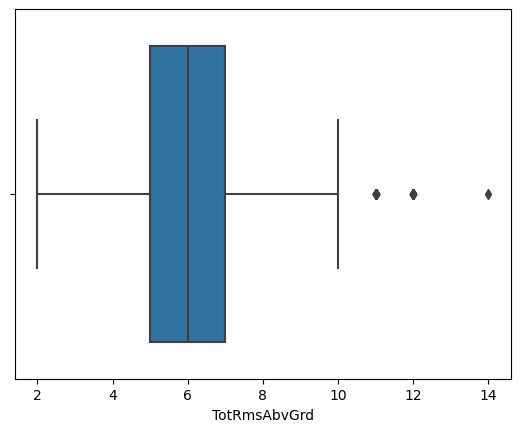

In [120]:
sns.boxplot(x=df["TotRmsAbvGrd"])

Se observan datos atípicos

2.-¿En qué variables identifica un tipo de sesgo? Usar histogramas

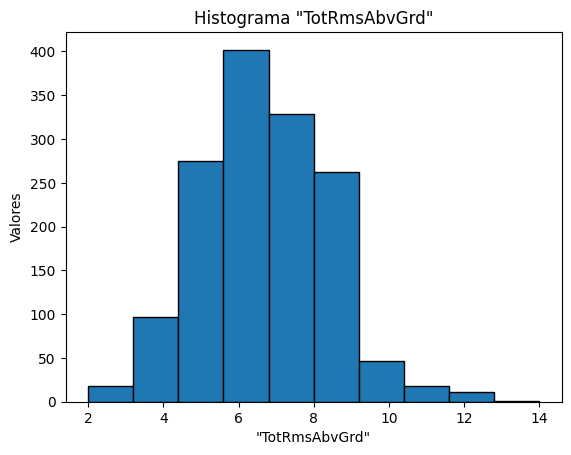

In [121]:
plt.hist(df["TotRmsAbvGrd"], edgecolor='black')  # You can adjust the number of bins
plt.xlabel('"TotRmsAbvGrd"')
plt.ylabel('Valores')
plt.title('Histograma "TotRmsAbvGrd"')
plt.show()

Se observa un sesgo positivo

3.-¿Sigue una distribución normal cada variable numérica? Usar prueba de Anderson Darling

In [122]:
# Prueba de Anderson-Darling
resultado = anderson(df["TotRmsAbvGrd"])
print("Estadística de prueba:", resultado.statistic)
print("Valores críticos:", resultado.critical_values)
print("Niveles de significancia:", resultado.significance_level)

if resultado.statistic < resultado.critical_values[2]:
    print("Distribución normal")
else:
    print("No sigue distribución normal")

Estadística de prueba: 31.94098041337338
Valores críticos: [0.574 0.654 0.785 0.916 1.089]
Niveles de significancia: [15.  10.   5.   2.5  1. ]
No sigue distribución normal


4.-¿Qué medida de tendencia central describe mejor a la variable y por qué? (media o mediana)

Notas:
* Si se sigue una distribución normal entonces la media y mediana es lo mismo, por lo que se puede elegir cualquier tendencia para describir a la variable.
* Si no se sigue una distribución normal entonces la media no aporta información relevante (genera ruido), por lo tanto la tendencia central que describe mejor a la variable es la "mediana" debido a que representa la mitad de los valores intrínsecos.

In [123]:
print("Media:",statistics.mean(df["TotRmsAbvGrd"]))
print("Mediana:",statistics.median(df["TotRmsAbvGrd"]))

Media: 6.517808219178082
Mediana: 6.0


Debido a que la variable no sigue una distribución normal, la medida de tendencia central que mejor describe a la variable es la **mediana**.

5.-¿Qué medida de variabilidad describe mejor a cada variable numérica y por qué? (desviación o rango intercuartil)

Notas:
* Si se sigue una distribución normal, entonces se ocupa una desviación estándar.
* Si no se sigue una distribución normal, entonces acompaña a la mediadana. Es decir, se ocupa como medida de vairiabilidad el rando intercuartil.

In [124]:
statistics.stdev(df["TotRmsAbvGrd"])

1.6253932905840505

In [125]:
iqr(df["TotRmsAbvGrd"])

2.0

En este caso, debido a que la medida de tendencia que se seleccionó es la mediana, la medida de variabilidad que mejor describe a cada variable es el **rango intercuartil** que para este caso es 2

# Fireplaces

1.-¿Qué variables presentan datos atípicos? Para este punto utilizar Bloxplots

<Axes: xlabel='Fireplaces'>

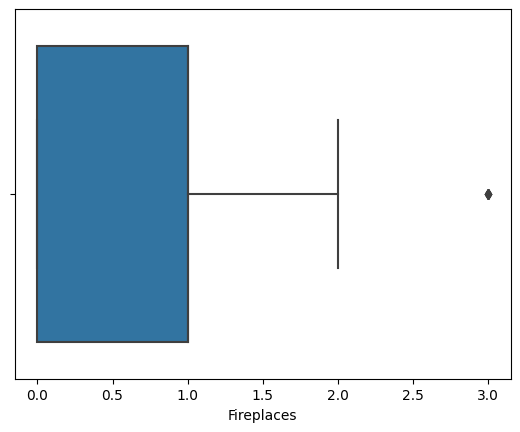

In [126]:
sns.boxplot(x=df["Fireplaces"])

Se observan datos atípicos

2.-¿En qué variables identifica un tipo de sesgo? Usar histogramas

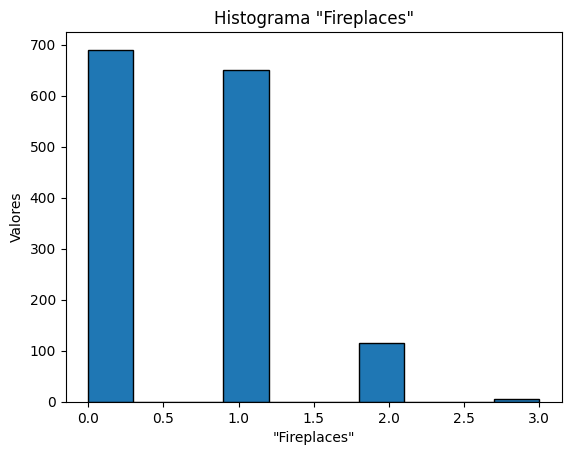

In [127]:
plt.hist(df["Fireplaces"], edgecolor='black')  # You can adjust the number of bins
plt.xlabel('"Fireplaces"')
plt.ylabel('Valores')
plt.title('Histograma "Fireplaces"')
plt.show()

Se observa un sesgo positivo

3.-¿Sigue una distribución normal cada variable numérica? Usar prueba de Anderson Darling

In [128]:
# Prueba de Anderson-Darling
resultado = anderson(df["Fireplaces"])
print("Estadística de prueba:", resultado.statistic)
print("Valores críticos:", resultado.critical_values)
print("Niveles de significancia:", resultado.significance_level)

if resultado.statistic < resultado.critical_values[2]:
    print("Distribución normal")
else:
    print("No sigue distribución normal")

Estadística de prueba: 160.53711330115175
Valores críticos: [0.574 0.654 0.785 0.916 1.089]
Niveles de significancia: [15.  10.   5.   2.5  1. ]
No sigue distribución normal


4.-¿Qué medida de tendencia central describe mejor a la variable y por qué? (media o mediana)

Notas:
* Si se sigue una distribución normal entonces la media y mediana es lo mismo, por lo que se puede elegir cualquier tendencia para describir a la variable.
* Si no se sigue una distribución normal entonces la media no aporta información relevante (genera ruido), por lo tanto la tendencia central que describe mejor a la variable es la "mediana" debido a que representa la mitad de los valores intrínsecos.

In [129]:
print("Media:",statistics.mean(df["Fireplaces"]))
print("Mediana:",statistics.median(df["Fireplaces"]))

Media: 0.613013698630137
Mediana: 1.0


Debido a que la variable no sigue una distribución normal, la medida de tendencia central que mejor describe a la variable es la **mediana**.

5.-¿Qué medida de variabilidad describe mejor a cada variable numérica y por qué? (desviación o rango intercuartil)

Notas:
* Si se sigue una distribución normal, entonces se ocupa una desviación estándar.
* Si no se sigue una distribución normal, entonces acompaña a la mediadana. Es decir, se ocupa como medida de vairiabilidad el rando intercuartil.

In [130]:
statistics.stdev(df["Fireplaces"])

0.6446663863122295

In [131]:
iqr(df["Fireplaces"])

1.0

En este caso, debido a que la medida de tendencia que se seleccionó es la mediana, la medida de variabilidad que mejor describe a cada variable es el **rango intercuartil** que para este caso es 1

# WoodDeckSF

1.-¿Qué variables presentan datos atípicos? Para este punto utilizar Bloxplots

<Axes: xlabel='WoodDeckSF'>

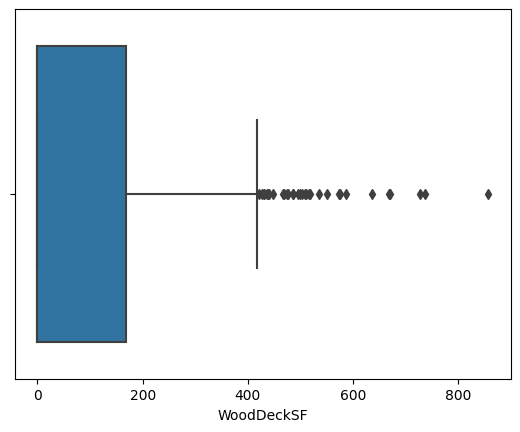

In [132]:
sns.boxplot(x=df["WoodDeckSF"])

Se observan muchos datos atípicos

2.-¿En qué variables identifica un tipo de sesgo? Usar histogramas

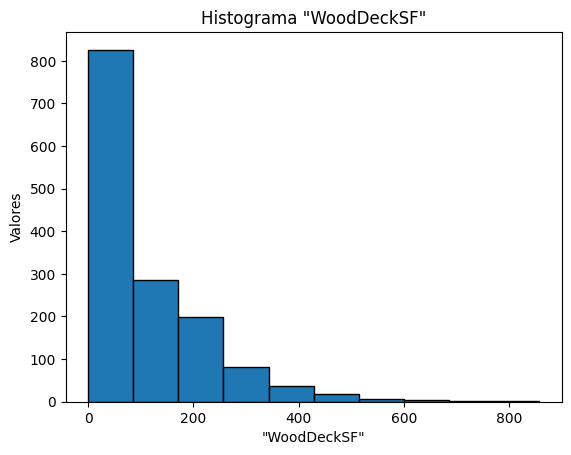

In [133]:
plt.hist(df["WoodDeckSF"], edgecolor='black')  # You can adjust the number of bins
plt.xlabel('"WoodDeckSF"')
plt.ylabel('Valores')
plt.title('Histograma "WoodDeckSF"')
plt.show()

Esta variable tiene un sesgo positivo

3.-¿Sigue una distribución normal cada variable numérica? Usar prueba de Anderson Darling

In [134]:
# Prueba de Anderson-Darling
resultado = anderson(df["WoodDeckSF"])
print("Estadística de prueba:", resultado.statistic)
print("Valores críticos:", resultado.critical_values)
print("Niveles de significancia:", resultado.significance_level)

if resultado.statistic < resultado.critical_values[2]:
    print("Distribución normal")
else:
    print("No sigue distribución normal")

Estadística de prueba: 119.71213740485246
Valores críticos: [0.574 0.654 0.785 0.916 1.089]
Niveles de significancia: [15.  10.   5.   2.5  1. ]
No sigue distribución normal


4.-¿Qué medida de tendencia central describe mejor a la variable y por qué? (media o mediana)

Notas:
* Si se sigue una distribución normal entonces la media y mediana es lo mismo, por lo que se puede elegir cualquier tendencia para describir a la variable.
* Si no se sigue una distribución normal entonces la media no aporta información relevante (genera ruido), por lo tanto la tendencia central que describe mejor a la variable es la "mediana" debido a que representa la mitad de los valores intrínsecos.

In [135]:
print("Media:",statistics.mean(df["WoodDeckSF"]))
print("Mediana:",statistics.median(df["WoodDeckSF"]))

Media: 94.2445205479452
Mediana: 0.0


Debido a que la variable no sigue una distribución normal, la medida de tendencia central que mejor describe a la variable es la **mediana**.

5.-¿Qué medida de variabilidad describe mejor a cada variable numérica y por qué? (desviación o rango intercuartil)

Notas:
* Si se sigue una distribución normal, entonces se ocupa una desviación estándar.
* Si no se sigue una distribución normal, entonces acompaña a la mediadana. Es decir, se ocupa como medida de vairiabilidad el rando intercuartil.

In [136]:
statistics.stdev(df["WoodDeckSF"])

125.3387943517241

In [137]:
iqr(df["WoodDeckSF"])

168.0

En este caso, debido a que la medida de tendencia que se seleccionó es la mediana, la medida de variabilidad que mejor describe a cada variable es el **rango intercuartil** que para este caso es 168

# OpenPorchSF

1.-¿Qué variables presentan datos atípicos? Para este punto utilizar Bloxplots

<Axes: xlabel='OpenPorchSF'>

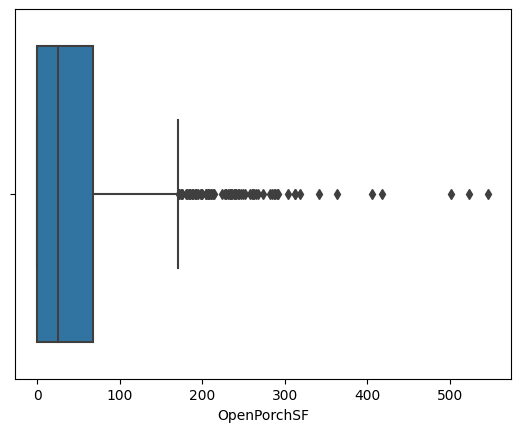

In [138]:
sns.boxplot(x=df["OpenPorchSF"])

Se observan muchos datos atípicos

2.-¿En qué variables identifica un tipo de sesgo? Usar histogramas

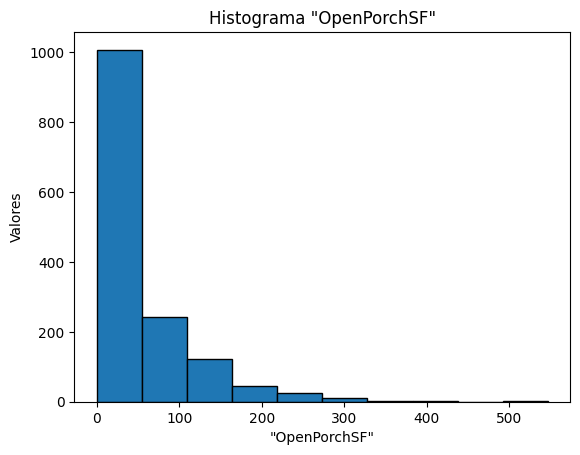

In [139]:
plt.hist(df["OpenPorchSF"], edgecolor='black')  # You can adjust the number of bins
plt.xlabel('"OpenPorchSF"')
plt.ylabel('Valores')
plt.title('Histograma "OpenPorchSF"')
plt.show()

Se presenta un sesgo positivo 

3.-¿Sigue una distribución normal cada variable numérica? Usar prueba de Anderson Darling

In [140]:
# Prueba de Anderson-Darling
resultado = anderson(df["OpenPorchSF"])
print("Estadística de prueba:", resultado.statistic)
print("Valores críticos:", resultado.critical_values)
print("Niveles de significancia:", resultado.significance_level)

if resultado.statistic < resultado.critical_values[2]:
    print("Distribución normal")
else:
    print("No sigue distribución normal")

Estadística de prueba: 115.91895898622147
Valores críticos: [0.574 0.654 0.785 0.916 1.089]
Niveles de significancia: [15.  10.   5.   2.5  1. ]
No sigue distribución normal


4.-¿Qué medida de tendencia central describe mejor a la variable y por qué? (media o mediana)

Notas:
* Si se sigue una distribución normal entonces la media y mediana es lo mismo, por lo que se puede elegir cualquier tendencia para describir a la variable.
* Si no se sigue una distribución normal entonces la media no aporta información relevante (genera ruido), por lo tanto la tendencia central que describe mejor a la variable es la "mediana" debido a que representa la mitad de los valores intrínsecos.

In [141]:
print("Media:",statistics.mean(df["OpenPorchSF"]))
print("Mediana:",statistics.median(df["OpenPorchSF"]))

Media: 46.66027397260274
Mediana: 25.0


Debido a que la variable no sigue una distribución normal, la medida de tendencia central que mejor describe a la variable es la **mediana**.

5.-¿Qué medida de variabilidad describe mejor a cada variable numérica y por qué? (desviación o rango intercuartil)

Notas:
* Si se sigue una distribución normal, entonces se ocupa una desviación estándar.
* Si no se sigue una distribución normal, entonces acompaña a la mediadana. Es decir, se ocupa como medida de vairiabilidad el rando intercuartil.

In [142]:
statistics.stdev(df["OpenPorchSF"])

66.25602767664971

In [143]:
iqr(df["OpenPorchSF"])

68.0

En este caso, debido a que la medida de tendencia que se seleccionó es la mediana, la medida de variabilidad que mejor describe a cada variable es el **rango intercuartil** que para este caso es 72

# EnclosedPorch

1.-¿Qué variables presentan datos atípicos? Para este punto utilizar Bloxplots

<Axes: xlabel='EnclosedPorch'>

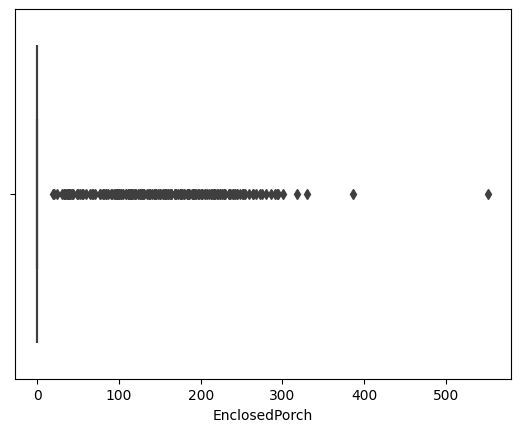

In [144]:
sns.boxplot(x=df["EnclosedPorch"])

Esta variable tiene muchos datos atípicos

2.-¿En qué variables identifica un tipo de sesgo? Usar histogramas

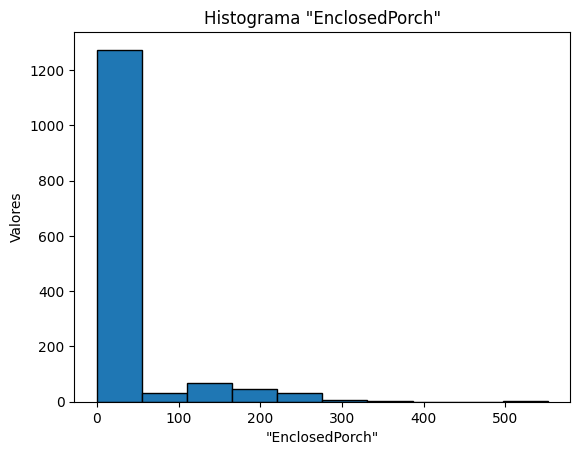

In [145]:
plt.hist(df["EnclosedPorch"], edgecolor='black')  # You can adjust the number of bins
plt.xlabel('"EnclosedPorch"')
plt.ylabel('Valores')
plt.title('Histograma "EnclosedPorch"')
plt.show()

Existe un sesgo positivo en esta variable

3.-¿Sigue una distribución normal cada variable numérica? Usar prueba de Anderson Darling

In [146]:
# Prueba de Anderson-Darling
resultado = anderson(df["EnclosedPorch"])
print("Estadística de prueba:", resultado.statistic)
print("Valores críticos:", resultado.critical_values)
print("Niveles de significancia:", resultado.significance_level)

if resultado.statistic < resultado.critical_values[2]:
    print("Distribución normal")
else:
    print("No sigue distribución normal")

Estadística de prueba: 398.9383732819804
Valores críticos: [0.574 0.654 0.785 0.916 1.089]
Niveles de significancia: [15.  10.   5.   2.5  1. ]
No sigue distribución normal


4.-¿Qué medida de tendencia central describe mejor a la variable y por qué? (media o mediana)

Notas:
* Si se sigue una distribución normal entonces la media y mediana es lo mismo, por lo que se puede elegir cualquier tendencia para describir a la variable.
* Si no se sigue una distribución normal entonces la media no aporta información relevante (genera ruido), por lo tanto la tendencia central que describe mejor a la variable es la "mediana" debido a que representa la mitad de los valores intrínsecos.

In [147]:
print("Media:",statistics.mean(df["EnclosedPorch"]))
print("Mediana:",statistics.median(df["EnclosedPorch"]))

Media: 21.954109589041096
Mediana: 0.0


Debido a que la variable no sigue una distribución normal, la medida de tendencia central que mejor describe a la variable es la **mediana**.

5.-¿Qué medida de variabilidad describe mejor a cada variable numérica y por qué? (desviación o rango intercuartil)

Notas:
* Si se sigue una distribución normal, entonces se ocupa una desviación estándar.
* Si no se sigue una distribución normal, entonces acompaña a la mediadana. Es decir, se ocupa como medida de vairiabilidad el rando intercuartil.

In [148]:
statistics.stdev(df["EnclosedPorch"])

61.1191486017286

In [149]:
iqr(df["EnclosedPorch"])

0.0

En este caso, debido a que la medida de tendencia que se seleccionó es la mediana, la medida de variabilidad que mejor describe a cada variable es el **rango intercuartil** que para este caso es 0